# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [26]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [27]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | manokwari
Processing Record 5 of Set 1 | afaahiti
Processing Record 6 of Set 1 | pimentel
Processing Record 7 of Set 1 | junin
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | aripuana
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | beira
Processing Record 14 of Set 1 | chonchi
Processing Record 15 of Set 1 | kourou
Processing Record 16 of Set 1 | betio village
Processing Record 17 of Set 1 | maharaganj
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | kaya
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | sitka
Processing Record 22 of Set 1 | naze
Processing Record 23 of Set 1 | bilib

Processing Record 42 of Set 4 | byalynichy
Processing Record 43 of Set 4 | banda aceh
Processing Record 44 of Set 4 | shimoda
Processing Record 45 of Set 4 | kismayo
Processing Record 46 of Set 4 | tual
Processing Record 47 of Set 4 | puerto leguizamo
Processing Record 48 of Set 4 | okhotsk
Processing Record 49 of Set 4 | santa rosa del sur
Processing Record 0 of Set 5 | sinabang
Processing Record 1 of Set 5 | klyuchi
Processing Record 2 of Set 5 | wyoming
Processing Record 3 of Set 5 | lambton shores
City not found. Skipping...
Processing Record 4 of Set 5 | piacabucu
Processing Record 5 of Set 5 | margaret river
Processing Record 6 of Set 5 | ampasimanolotra
City not found. Skipping...
Processing Record 7 of Set 5 | paita
Processing Record 8 of Set 5 | zabaykal'sk
Processing Record 9 of Set 5 | srandakan
Processing Record 10 of Set 5 | flying fish cove
Processing Record 11 of Set 5 | anadyr
Processing Record 12 of Set 5 | omutinskiy
Processing Record 13 of Set 5 | cargados carajos
Ci

Processing Record 32 of Set 8 | riohacha
Processing Record 33 of Set 8 | 'ohonua
City not found. Skipping...
Processing Record 34 of Set 8 | floriano
Processing Record 35 of Set 8 | guarapari
Processing Record 36 of Set 8 | iquique
Processing Record 37 of Set 8 | tobruk
Processing Record 38 of Set 8 | ambovombe
Processing Record 39 of Set 8 | carnot
Processing Record 40 of Set 8 | toga village
City not found. Skipping...
Processing Record 41 of Set 8 | hayma'
City not found. Skipping...
Processing Record 42 of Set 8 | pointe-noire
Processing Record 43 of Set 8 | iturama
Processing Record 44 of Set 8 | ust'-kulom
Processing Record 45 of Set 8 | amahai
Processing Record 46 of Set 8 | ancaster
Processing Record 47 of Set 8 | ippy
Processing Record 48 of Set 8 | kostomuksha
Processing Record 49 of Set 8 | sao joao da barra
Processing Record 0 of Set 9 | cameta
Processing Record 1 of Set 9 | ulladulla
Processing Record 2 of Set 9 | kuje
Processing Record 3 of Set 9 | prainha
Processing Reco

Processing Record 23 of Set 12 | sebring
Processing Record 24 of Set 12 | carnarvon
Processing Record 25 of Set 12 | yelizovo
Processing Record 26 of Set 12 | revda
Processing Record 27 of Set 12 | yanggu
Processing Record 28 of Set 12 | birobidzhan
Processing Record 29 of Set 12 | madalena
Processing Record 30 of Set 12 | sola
Processing Record 31 of Set 12 | lolodorf
Processing Record 32 of Set 12 | chhor
Processing Record 33 of Set 12 | shizuishan
Processing Record 34 of Set 12 | mogila
Processing Record 35 of Set 12 | salekhard
Processing Record 36 of Set 12 | kingscliff
Processing Record 37 of Set 12 | inhambane
Processing Record 38 of Set 12 | lucaya
Processing Record 39 of Set 12 | rikaze
Processing Record 40 of Set 12 | sandviken
Processing Record 41 of Set 12 | porto santo stefano
Processing Record 42 of Set 12 | pontevedra
Processing Record 43 of Set 12 | sao gabriel da cachoeira
Processing Record 44 of Set 12 | trairi
Processing Record 45 of Set 12 | afif
Processing Record 4

In [3]:
# Set the API base URL
url = # YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = # YOUR CODE HERE
        city_lng = # YOUR CODE HERE
        city_max_temp = # YOUR CODE HERE
        city_humidity = # YOUR CODE HERE
        city_clouds = # YOUR CODE HERE
        city_wind = # YOUR CODE HERE
        city_country = # YOUR CODE HERE
        city_date = # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | faya
Processing Record 2 of Set 1 | farsund
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | lanzhou
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | sisimiut
Processing Record 10 of Set 1 | samusu
City not found. Skipping...
Processing Record 11 of Set 1 | saint-pierre
Processing Record 12 of Set 1 | colorado
Processing Record 13 of Set 1 | nikolskoye
Processing Record 14 of Set 1 | trairi
Processing Record 15 of Set 1 | dobryanka
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | khatanga
Processing Record 19 of Set 1 | tasiilaq
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | avarua
Processing Record 23 of

Processing Record 33 of Set 4 | belmonte
Processing Record 34 of Set 4 | pisco
Processing Record 35 of Set 4 | ambilobe
Processing Record 36 of Set 4 | aripuana
Processing Record 37 of Set 4 | kaitangata
Processing Record 38 of Set 4 | warqla
City not found. Skipping...
Processing Record 39 of Set 4 | lesnoy
Processing Record 40 of Set 4 | evensk
Processing Record 41 of Set 4 | sur
Processing Record 42 of Set 4 | la ronge
Processing Record 43 of Set 4 | danielskuil
Processing Record 44 of Set 4 | chunhuhub
Processing Record 45 of Set 4 | avera
Processing Record 46 of Set 4 | ouallam
Processing Record 47 of Set 4 | challapata
Processing Record 48 of Set 4 | samalaeulu
City not found. Skipping...
Processing Record 49 of Set 4 | olafsvik
Processing Record 0 of Set 5 | neepawa
Processing Record 1 of Set 5 | freetown
Processing Record 2 of Set 5 | nome
Processing Record 3 of Set 5 | hovd
Processing Record 4 of Set 5 | ugra
Processing Record 5 of Set 5 | upernavik
Processing Record 6 of Set 

Processing Record 25 of Set 8 | torrington
Processing Record 26 of Set 8 | krutikha
Processing Record 27 of Set 8 | bonavista
Processing Record 28 of Set 8 | zaysan
Processing Record 29 of Set 8 | mana
Processing Record 30 of Set 8 | nemuro
Processing Record 31 of Set 8 | mandera
Processing Record 32 of Set 8 | numan
Processing Record 33 of Set 8 | pingliang
Processing Record 34 of Set 8 | saldanha
Processing Record 35 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 36 of Set 8 | vila velha
Processing Record 37 of Set 8 | bengkulu
Processing Record 38 of Set 8 | honiara
Processing Record 39 of Set 8 | pemba
Processing Record 40 of Set 8 | viligili
City not found. Skipping...
Processing Record 41 of Set 8 | ahipara
Processing Record 42 of Set 8 | shingu
Processing Record 43 of Set 8 | bargal
City not found. Skipping...
Processing Record 44 of Set 8 | korla
Processing Record 45 of Set 8 | lerik
Processing Record 46 of Set 8 | quelimane
Processing Record 47 of Set 8 | katyuzhanka
P

Processing Record 14 of Set 12 | nsanje
Processing Record 15 of Set 12 | xuchang
Processing Record 16 of Set 12 | todos santos
Processing Record 17 of Set 12 | kuhestan
City not found. Skipping...
Processing Record 18 of Set 12 | bataipora
Processing Record 19 of Set 12 | tateyama
Processing Record 20 of Set 12 | wajima
Processing Record 21 of Set 12 | pokosnoye
Processing Record 22 of Set 12 | waipawa
Processing Record 23 of Set 12 | yaring
Processing Record 24 of Set 12 | isiro
Processing Record 25 of Set 12 | chivilcoy
Processing Record 26 of Set 12 | mandalgovi
Processing Record 27 of Set 12 | nicoya
Processing Record 28 of Set 12 | novocheremshansk
Processing Record 29 of Set 12 | emirdag
Processing Record 30 of Set 12 | nouadhibou
Processing Record 31 of Set 12 | tongliao
Processing Record 32 of Set 12 | ryomgard
Processing Record 33 of Set 12 | khudumelapye
Processing Record 34 of Set 12 | talcahuano
Processing Record 35 of Set 12 | gifhorn
Processing Record 36 of Set 12 | bilma

In [28]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(city_data)
# Show Record Count
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,-6.28,79,100,5.81,CA,1681960445
1,jamestown,42.0970,-79.2353,5.77,75,75,0.00,US,1681960446
2,grytviken,-54.2811,-36.5092,3.24,92,99,2.70,GS,1681960446
3,manokwari,-0.8667,134.0833,27.91,76,100,1.33,ID,1681960447
4,afaahiti,-17.7500,-149.2833,27.93,84,98,6.51,PF,1681960447
...,...,...,...,...,...,...,...,...,...
583,tadmur,34.5608,38.2805,18.31,57,37,2.73,SY,1681960622
584,kochubey,44.3861,46.5825,10.21,70,24,5.86,RU,1681960622
585,varzea da palma,-17.5981,-44.7308,21.80,86,95,0.86,BR,1681960623
586,bamyan,34.7500,67.2500,0.68,69,7,0.93,AF,1681960623


In [29]:
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [30]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,-6.28,79,100,5.81,CA,1681960445
1,jamestown,42.0970,-79.2353,5.77,75,75,0.00,US,1681960446
2,grytviken,-54.2811,-36.5092,3.24,92,99,2.70,GS,1681960446
3,manokwari,-0.8667,134.0833,27.91,76,100,1.33,ID,1681960447
4,afaahiti,-17.7500,-149.2833,27.93,84,98,6.51,PF,1681960447


In [31]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [44]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,-6.28,79,100,5.81,CA,1681960445
1,jamestown,42.0970,-79.2353,5.77,75,75,0.00,US,1681960446
2,grytviken,-54.2811,-36.5092,3.24,92,99,2.70,GS,1681960446
3,manokwari,-0.8667,134.0833,27.91,76,100,1.33,ID,1681960447
4,afaahiti,-17.7500,-149.2833,27.93,84,98,6.51,PF,1681960447
5,pimentel,-6.8367,-79.9342,25.16,73,0,3.09,PE,1681960447
6,junin,-34.5838,-60.9433,8.27,82,0,1.46,AR,1681960207
7,waitangi,-43.9535,-176.5597,17.12,90,97,3.58,NZ,1681960448
8,yellowknife,62.4560,-114.3525,-0.82,81,8,2.75,CA,1681960370


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [46]:
from datetime import datetime


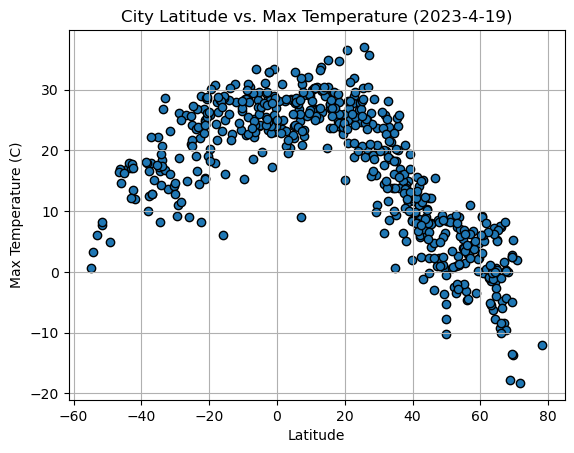

In [54]:
# --- create a scatter plot depicting latitude vs temperature ---
plt.scatter(
    city_data_df['Lat'],
    city_data_df['Max Temp'],
    edgecolors='black'
)

# Incorporate the other graph properties
today_date = str(datetime.now().year)+'-'+str(datetime.now().month)+'-'+str(datetime.now().day)

plt.title(f"City Latitude vs. Max Temperature ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

plt.savefig("C:/Users/maisa/OneDrive/Desktop/Starter_Code/output_data/Latvstemp.png")


# Show plot
plt.show()

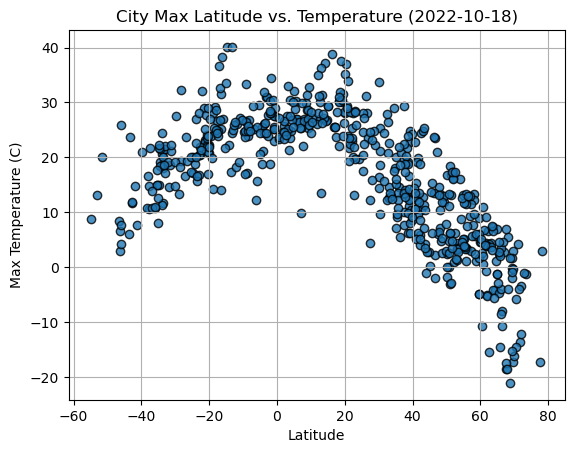

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

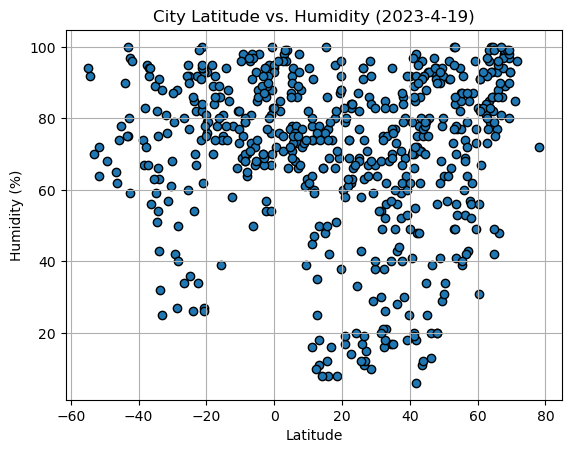

In [55]:
plt.scatter(
    city_data_df['Lat'],
    city_data_df['Humidity'],
    edgecolors='black'
)

# Incorporate the other graph properties
today_date = str(datetime.now().year)+'-'+str(datetime.now().month)+'-'+str(datetime.now().day)

plt.title(f"City Latitude vs. Humidity ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()


# Save the figure
plt.savefig("../output_data/latvshum.png")

# Show plot
plt.show()

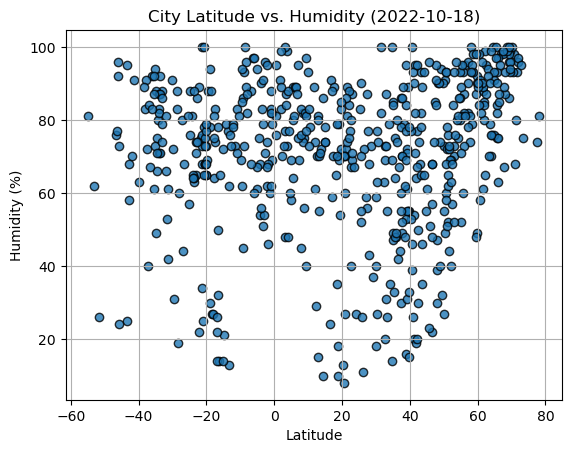

In [9]:
plt.scatter(
    city_data_df['Lat'],
    city_data_df['Max Temp'],
    edgecolors='black'
)

# Incorporate the other graph properties
today_date = str(datetime.now().year)+'-'+str(datetime.now().month)+'-'+str(datetime.now().day)

plt.title(f"City Latitude vs. Max Temperature ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

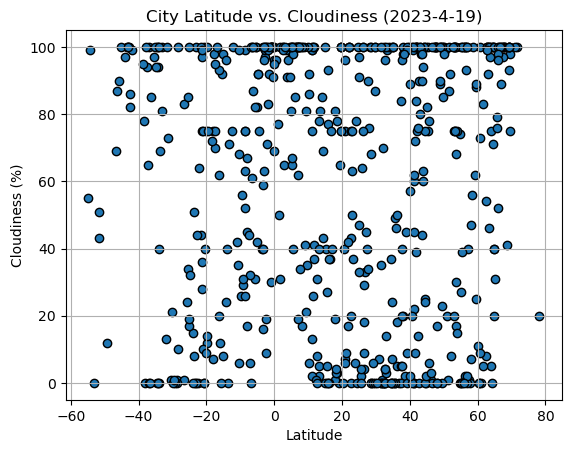

In [56]:
plt.scatter(
    city_data_df['Lat'],
    city_data_df['Cloudiness'],
    edgecolors='black'
)

# Incorporate the other graph properties
today_date = str(datetime.now().year)+'-'+str(datetime.now().month)+'-'+str(datetime.now().day)

plt.title(f"City Latitude vs. Cloudiness ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()


# Save the figure
plt.savefig("../output_data/latvscloud.png")

# Show plot
plt.show()

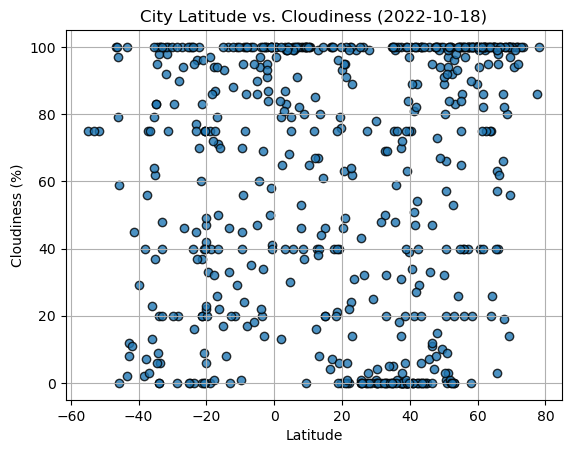

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

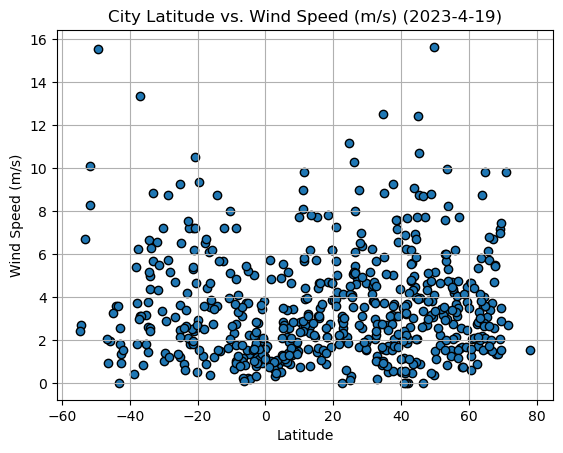

In [57]:
plt.scatter(
    city_data_df['Lat'],
    city_data_df['Wind Speed'],
    edgecolors='black'
)

# Incorporate the other graph properties
today_date = str(datetime.now().year)+'-'+str(datetime.now().month)+'-'+str(datetime.now().day)

plt.title(f"City Latitude vs. Wind Speed (m/s) ({today_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()


# Save the figure
plt.savefig("../output_data/latvswind.png")

# Show plot
plt.show()

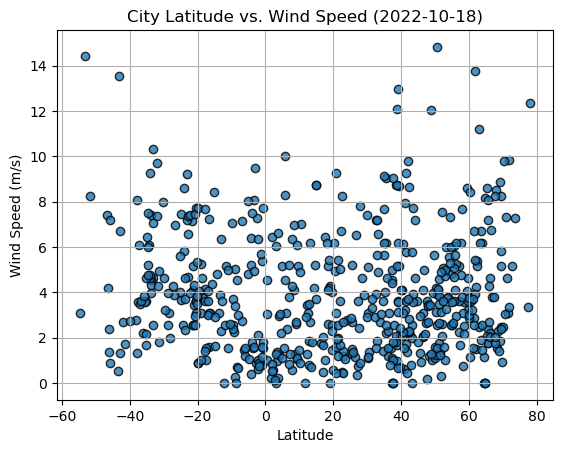

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [58]:
# Define a function to create Linear Regression plots
def create_linear_regression(x_values, y_values, annotation_tuple = None):
    # Get regression data
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Generate regression values and line equation
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create plot
    plt.scatter(x_values,y_values)
    
    # Label axes
    if x_values.name == 'Lat':
        plt.xlabel('Latitude')
    else:
        plt.xlabel(x_values.name)
    plt.ylabel(y_values.name)
    
    # Plot the linear regression
    if annotation_tuple == None:
        annotation_tuple = (0,0)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,annotation_tuple,fontsize=15,color="red")
    print(f"The r-squared is: {rvalue**2}")
    plt.show
    

In [59]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,-6.28,79,100,5.81,CA,1681960445
1,jamestown,42.0970,-79.2353,5.77,75,75,0.00,US,1681960446
8,yellowknife,62.4560,-114.3525,-0.82,81,8,2.75,CA,1681960370
14,kourou,5.1552,-52.6478,24.03,92,98,2.83,GF,1681960451
15,betio village,1.3580,172.9211,31.02,76,50,5.70,KI,1681960451


In [60]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,grytviken,-54.2811,-36.5092,3.24,92,99,2.70,GS,1681960446
3,manokwari,-0.8667,134.0833,27.91,76,100,1.33,ID,1681960447
4,afaahiti,-17.7500,-149.2833,27.93,84,98,6.51,PF,1681960447
5,pimentel,-6.8367,-79.9342,25.16,73,0,3.09,PE,1681960447
6,junin,-34.5838,-60.9433,8.27,82,0,1.46,AR,1681960207


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7819915109740132


FileNotFoundError: [Errno 2] No such file or directory: '..output_data/templatlin.png'

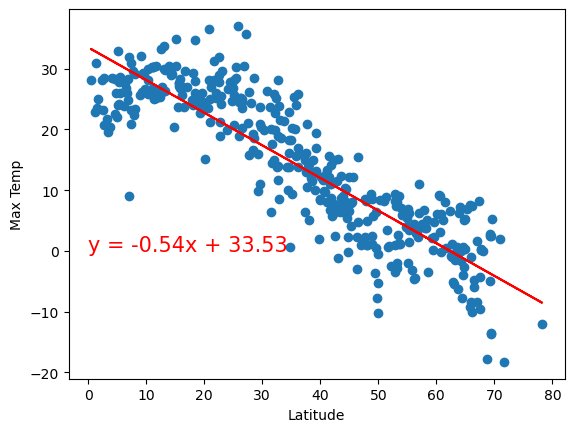

In [71]:
# Linear regression on Northern Hemisphere
create_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])


The r-value is: 0.7161472181434118


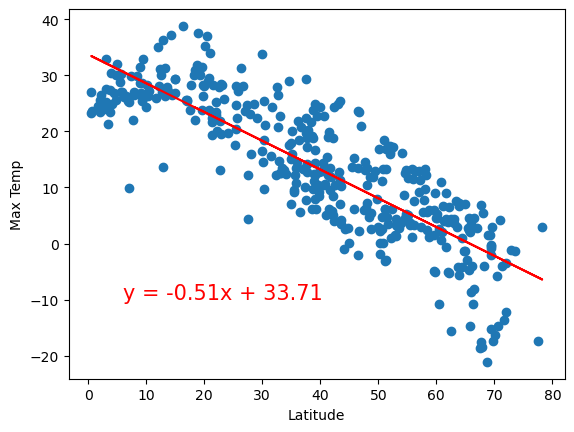

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-squared is: 0.5025932934919866


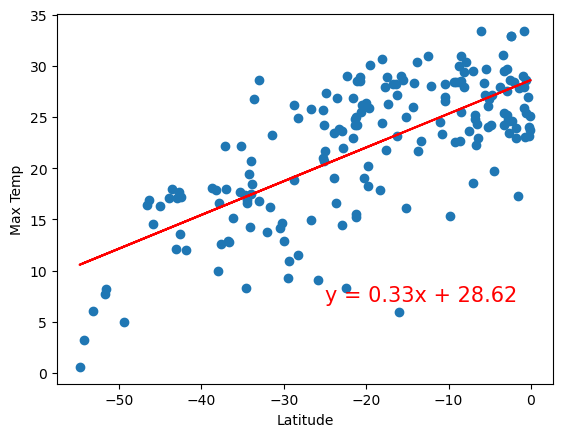

In [62]:
# Linear regression on Southern Hemisphere
create_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], (-25, 7))

The r-value is: 0.4121057168607245


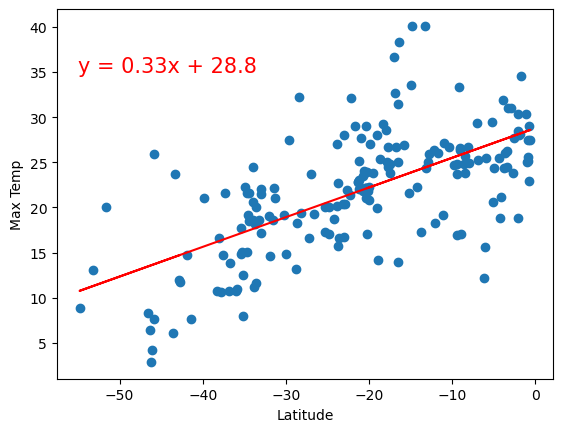

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** interesting how corr is higher in north compared to south.


### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.02940177350986821


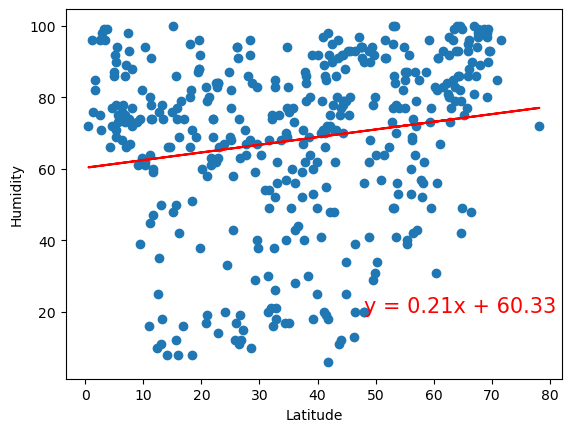

In [63]:
create_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], (48,20))

The r-value is: 0.05689741545789598


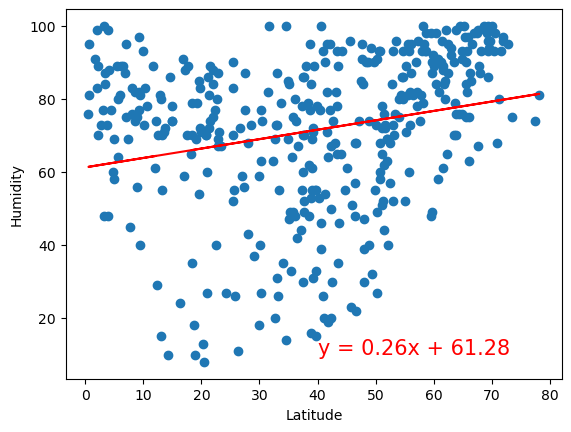

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-squared is: 0.03041487465949185


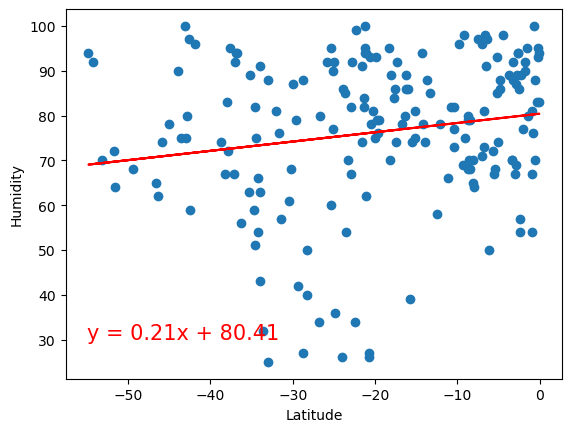

In [64]:
# Southern Hemisphere
create_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], (-55, 30))

The r-value is: 0.0002808747046324607


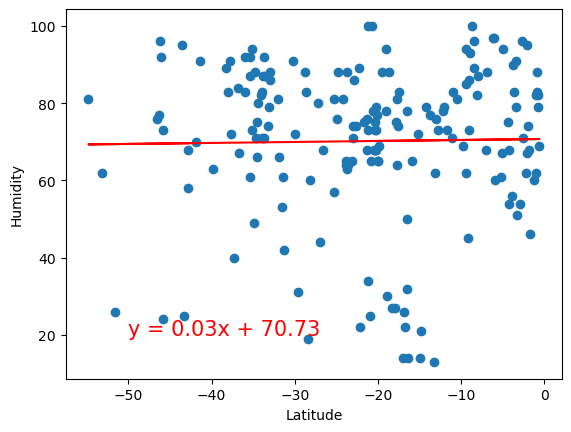

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:Humidity and lat are not corr,closer to equator higher humidity further the lower.


### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0043522132639833054


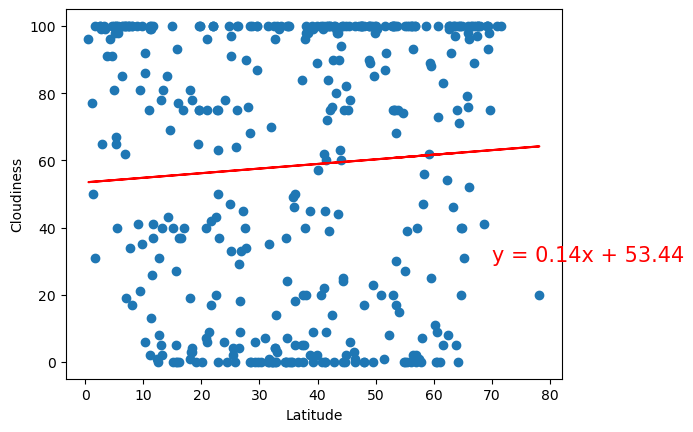

In [65]:
create_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], (70,30))

The r-value is: 0.024026517125811015


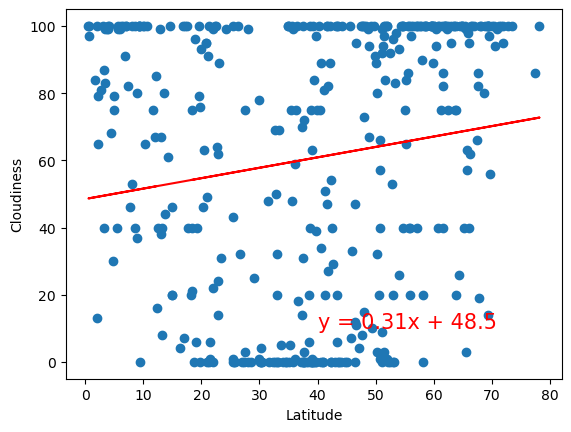

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-squared is: 0.009798631811152833


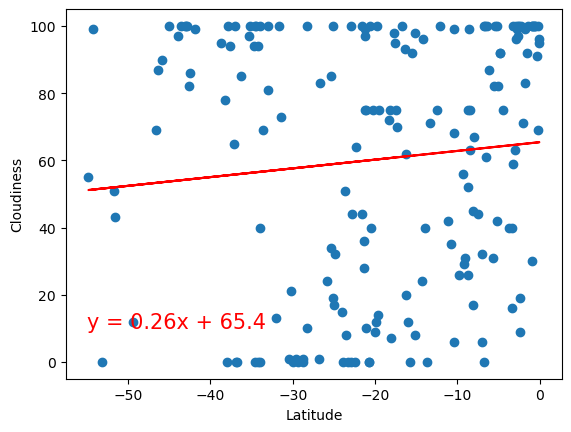

In [66]:
create_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], (-55,10))

The r-value is: 0.02056735429994368


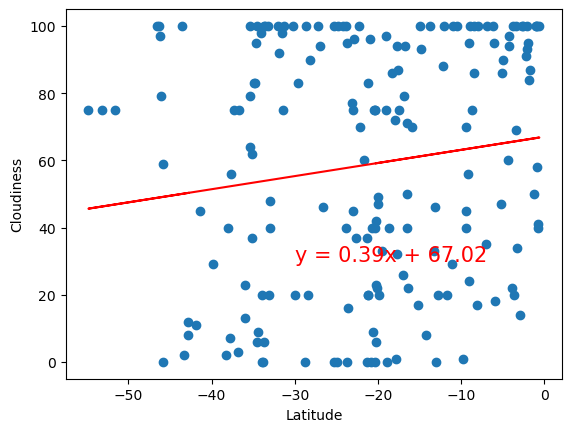

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship: Lat cloudiness have no corr, latt and cloudiness have positive slopes but outside of that nothing else matches.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.012843406755391792


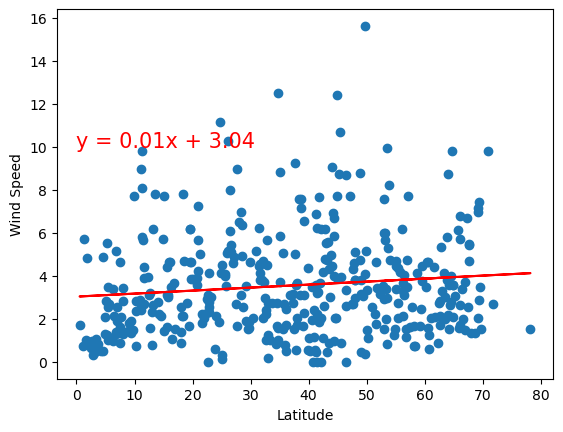

In [67]:
create_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], (0,10))

The r-value is: 0.030396762354449467


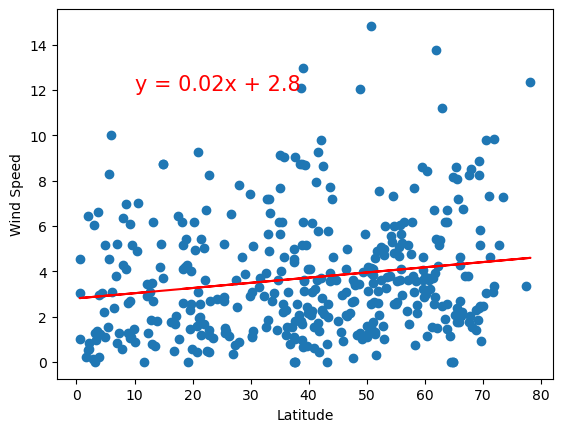

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-squared is: 0.0905160589220887


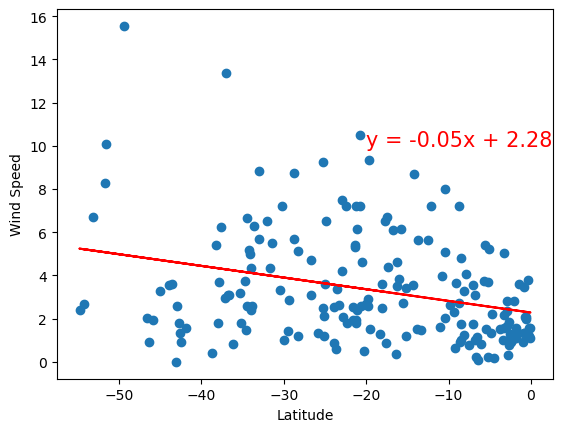

In [68]:
create_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], (-20,10))

The r-value is: 0.062239040700515696


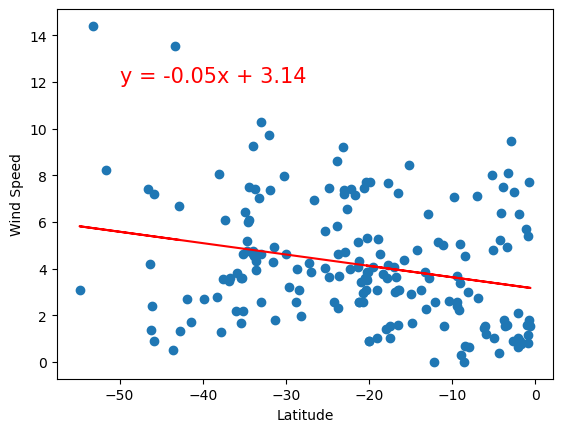

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:As the latt changes wind remains const. no corr.
